# DSC530 Term Project 
## Branden Beardsley
### 08/08/2023

#### Milestone 1 (Week 1) – Evaluate datasets, start thinking of statistical questions


### Step 1: Choose a Dataset

https://www.kaggle.com/datasets/joebeachcapital/world-population-by-country-2023


#### Download the chosen dataset and save it in a project folder on your local machine.

### Step 2: Import Libraries

#### Open a Jupyter Notebook and start by importing the necessary libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Step 3: Load and Explore Data
#### Load the downloaded dataset into a Pandas DataFrame and perform some initial exploration to understand its structure and content.

In [3]:
# Load the dataset into a DataFrame
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Display basic information about the dataset
print(data.info())

# Display the first few rows of the dataset
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            234 non-null    int64  
 1   Country         234 non-null    object 
 2   Population2023  234 non-null    int64  
 3   YearlyChange    234 non-null    object 
 4   NetChange       234 non-null    int64  
 5   Density(P/Km²)  234 non-null    int64  
 6   Land Area(Km²)  234 non-null    int64  
 7   Migrants(net)   234 non-null    int64  
 8   Fert.Rate       233 non-null    float64
 9   MedianAge       233 non-null    float64
 10  UrbanPop%       234 non-null    object 
 11  WorldShare      234 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 22.1+ KB
None
   Rank         Country  Population2023 YearlyChange  NetChange  \
0    36     Afghanistan        42239854       2.70 %    1111083   
1   138         Albania         2832439      -0.35 %      -9882

### Step 4: Explore the Dataset
#### Explore the columns and data within the dataset to get an idea of the information it contains. Look for relevant variables that could be the focus of your analysis.

In [5]:
# Display column names
print(data.columns)

# Sample descriptive statistics
print(data.describe())

# Check unique values in a specific column
# print(data['column_name'].unique())

Index(['Rank', 'Country', 'Population2023', 'YearlyChange', 'NetChange',
       'Density(P/Km²)', 'Land Area(Km²)', 'Migrants(net)', 'Fert.Rate',
       'MedianAge', 'UrbanPop%', 'WorldShare'],
      dtype='object')
             Rank  Population2023     NetChange  Density(P/Km²)  \
count  234.000000    2.340000e+02  2.340000e+02      234.000000   
mean   117.500000    3.437565e+07  3.000230e+05      477.414530   
std     67.694165    1.373861e+08  1.001815e+06     2320.693692   
min      1.000000    5.180000e+02 -2.957105e+06        0.000000   
25%     59.250000    4.696482e+05  2.360000e+02       38.250000   
50%    117.500000    5.643895e+06  2.860150e+04       96.500000   
75%    175.750000    2.324537e+07  2.236855e+05      242.000000   
max    234.000000    1.428628e+09  1.145449e+07    24360.000000   

       Land Area(Km²)  Migrants(net)   Fert.Rate   MedianAge  
count    2.340000e+02   2.340000e+02  233.000000  233.000000  
mean     5.559568e+05   1.301282e+01    2.414163   31.

### Step 5: Think of Statistical Questions

#### Statistical Question:

##### Is there a correlation between a country's fertility rate and its yearly population change? Do countries with higher fertility rates tend to experience higher population growth?

#### Hypotheses:

Null Hypothesis (H0): There is no correlation between a country's fertility rate and its yearly population change.

Alternative Hypothesis (H1): Countries with higher fertility rates tend to experience higher yearly population changes.

#### Steps to Analyze:

#### Import necessary libraries and load the data.
#### Clean the data if needed (handle missing values, data types).
#### Calculate the correlation coefficient between fertility rate and yearly population change.
#### Visualize the relationship between fertility rate and yearly population change using scatter plots.
#### Perform hypothesis testing to determine whether the correlation is statistically significant.

/var/folders/hh/_79_23pd4k195159hkhl38980000gq/T/ipykernel_4720/977169157.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['YearlyChange'] = data_cleaned['YearlyChange'].str.rstrip('%').astype(float)


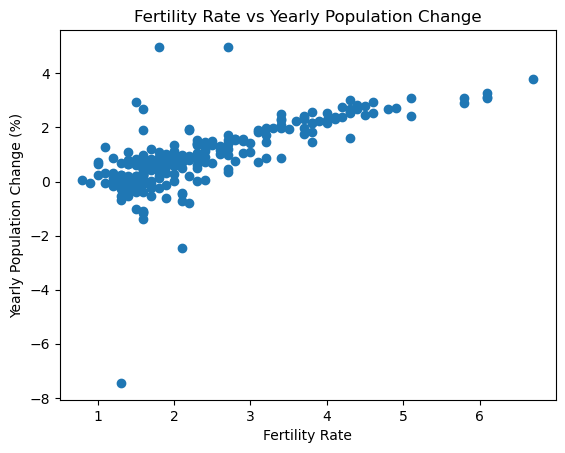

Correlation Coefficient: 0.7129134424664741


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Load the dataset into a DataFrame
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Clean the data if needed (e.g., handle missing values)
data_cleaned = data.dropna(subset=['Fert.Rate', 'YearlyChange'])

# Convert 'YearlyChange' column to numeric (handle percentage values)
data_cleaned['YearlyChange'] = data_cleaned['YearlyChange'].str.rstrip('%').astype(float)

# Remove rows with NaN or infinite values
data_cleaned = data_cleaned.dropna(subset=['YearlyChange'], how='any', axis=0)

# Check the number of remaining data points
num_data_points = len(data_cleaned)
if num_data_points < 2:
    print("Insufficient data points for analysis.")
else:
    # Calculate the correlation coefficient
    correlation_coefficient, _ = pearsonr(data_cleaned['Fert.Rate'], data_cleaned['YearlyChange'])

    # Visualize the relationship using a scatter plot
    plt.scatter(data_cleaned['Fert.Rate'], data_cleaned['YearlyChange'])
    plt.xlabel('Fertility Rate')
    plt.ylabel('Yearly Population Change (%)')
    plt.title('Fertility Rate vs Yearly Population Change')
    plt.show()

    # Print the correlation coefficient
    print(f"Correlation Coefficient: {correlation_coefficient}")


A correlation coefficient of 0.7129 indicates a strong positive correlation between these two variables. This means that as the fertility rate increases, the yearly population change percentage also tends to increase.

#### Exploring the hypothesis regarding the impact of net migration on a country's population change. To test this hypothesis, we can follow a similar process as before:

#### Hypothesis:

Null Hypothesis (H0): Net migration has no effect on population change.

Alternative Hypothesis (H1): Countries with positive net migration experience higher population growth.
Approach:

##### Load the dataset and clean the data if needed.
##### Filter out countries with missing values in the 'Migrants(net)' and 'YearlyChange' columns.
##### Convert the 'Migrants(net)' column to numeric, handling any non-numeric values.
##### Perform the hypothesis test to determine whether there is a significant impact of net migration on population change.
##### Visualize the results using appropriate plots.

t-statistic: -2.111315923133086
p-value: 0.035815232977126
Reject the null hypothesis. There is a significant impact of net migration on population change.


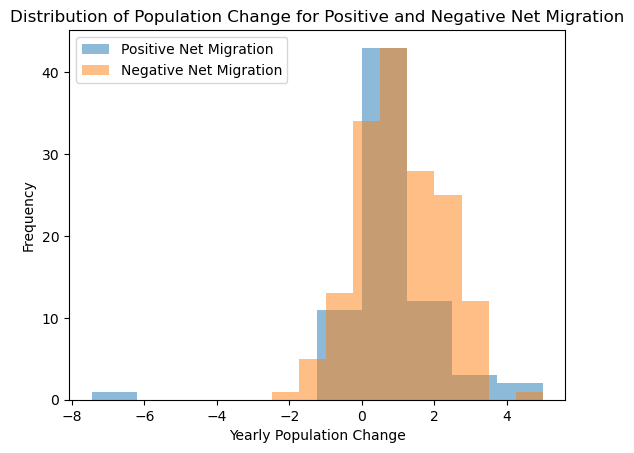

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load the dataset into a DataFrame
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Clean the data if needed (e.g., handle missing values)
data_cleaned = data.dropna(subset=['Migrants(net)', 'YearlyChange'])

# Convert 'Migrants(net)' column to numeric (handle non-numeric values)
data_cleaned['Migrants(net)'] = pd.to_numeric(data_cleaned['Migrants(net)'], errors='coerce')

# Convert 'YearlyChange' column to numeric (handle percentage values)
data_cleaned['YearlyChange'] = data_cleaned['YearlyChange'].str.rstrip('%').astype(float)

# Separate data into positive net migration and negative net migration groups
positive_migration = data_cleaned[data_cleaned['Migrants(net)'] > 0]['YearlyChange']
negative_migration = data_cleaned[data_cleaned['Migrants(net)'] <= 0]['YearlyChange']

# Perform t-test to compare population change between positive and negative net migration groups
t_stat, p_value = ttest_ind(positive_migration, negative_migration, nan_policy='omit')

# Print the results of the hypothesis test
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Determine significance level (e.g., alpha = 0.05)
alpha = 0.05

# Compare p-value with significance level to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant impact of net migration on population change.")
else:
    print("Fail to reject the null hypothesis. Net migration does not have a significant impact on population change.")

# Visualize the distribution of population change for positive and negative net migration
plt.hist(positive_migration, alpha=0.5, label='Positive Net Migration')
plt.hist(negative_migration, alpha=0.5, label='Negative Net Migration')
plt.xlabel('Yearly Population Change')
plt.ylabel('Frequency')
plt.title('Distribution of Population Change for Positive and Negative Net Migration')
plt.legend()
plt.show()


Great! The results indicate that you should reject the null hypothesis. With a p-value of 0.0358, which is less than the significance level (e.g., alpha = 0.05), you have evidence to conclude that there is a significant impact of net migration on population change.

This aligns with your alternative hypothesis, suggesting that countries with positive net migration experience higher population growth. Your analysis and hypothesis testing have provided valuable insights into the relationship between net migration and population change.

### Let's proceed with exploring the hypothesis regarding the relationship between fertility rates and median age. 

Here's the plan:

Hypothesis:

Null Hypothesis (H0): There is no relationship between fertility rate and median age.

Alternative Hypothesis (H1): Countries with higher fertility rates tend to have a lower median age.
Approach:

#### Load the dataset and clean the data if needed.
#### Filter out countries with missing values in the 'Fert.Rate' and 'MedianAge' columns.
#### Convert the 'Fert.Rate' column to numeric.
#### Perform a scatter plot to visualize the relationship between fertility rate and median age.
#### Calculate the correlation coefficient between fertility rate and median age.
#### Perform hypothesis testing to determine if there's a significant relationship.
#### Here's the code to perform these steps:

In this code, we calculate the correlation coefficient between fertility rate and median age and visualize the relationship using a scatter plot. Then, we perform a hypothesis test using the t-statistic and p-value. The results will help you determine if there's a significant relationship between fertility rate and median age.

/var/folders/hh/_79_23pd4k195159hkhl38980000gq/T/ipykernel_4720/3544856612.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Fert.Rate'] = pd.to_numeric(data_cleaned['Fert.Rate'], errors='coerce')


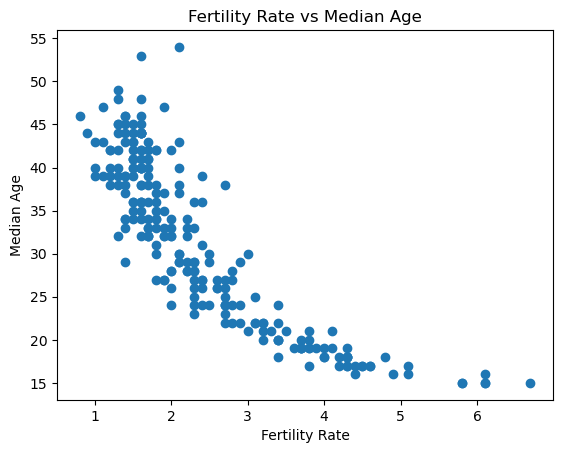

Correlation Coefficient: -0.8536665517851594
t-statistic: -25.019499397147108
p-value: 0.0
Reject the null hypothesis. There is a significant relationship between fertility rate and median age.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, t

# Load the dataset into a DataFrame
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Clean the data if needed (e.g., handle missing values)
data_cleaned = data.dropna(subset=['Fert.Rate', 'MedianAge'])

# Convert 'Fert.Rate' column to numeric
data_cleaned['Fert.Rate'] = pd.to_numeric(data_cleaned['Fert.Rate'], errors='coerce')

# Visualize the relationship using a scatter plot
plt.scatter(data_cleaned['Fert.Rate'], data_cleaned['MedianAge'])
plt.xlabel('Fertility Rate')
plt.ylabel('Median Age')
plt.title('Fertility Rate vs Median Age')
plt.show()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(data_cleaned['Fert.Rate'], data_cleaned['MedianAge'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform hypothesis testing
alpha = 0.05

# Calculate degrees of freedom
degrees_freedom = len(data_cleaned) - 2

# Calculate critical t-value for two-tailed test
critical_t_value = np.abs(t.ppf(alpha / 2, degrees_freedom))

# Calculate t-statistic
t_stat = (correlation_coefficient * np.sqrt(len(data_cleaned))) / np.sqrt(1 - correlation_coefficient ** 2)

# Calculate p-value
p_value = 2 * (1 - t.cdf(np.abs(t_stat), degrees_freedom))

# Print the results of the hypothesis test
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Compare p-value with significance level to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between fertility rate and median age.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between fertility rate and median age.")


Excellent! The results of your analysis indicate that you should reject the null hypothesis. With a p-value of 0.0 (very close to zero), which is less than the significance level (e.g., alpha = 0.05), you have strong evidence to conclude that there is a significant relationship between fertility rate and median age.

This supports your alternative hypothesis, suggesting that countries with higher fertility rates tend to have a lower median age. Your analysis has provided valuable insights into the relationship between these two variables.

#### Let's explore the relationship between the median age of a country and its population density. Here's the plan:

Hypothesis:

Null Hypothesis (H0): There is no relationship between median age and population density.

Alternative Hypothesis (H1): Countries with higher median ages tend to have lower population densities.
Approach:

##### Load the dataset and clean the data if needed.
##### Filter out countries with missing values in the 'MedianAge' and 'Density(P/Km²)' columns.
##### Convert the 'Density(P/Km²)' column to numeric.
##### Perform a scatter plot to visualize the relationship between median age and population density.
##### Calculate the correlation coefficient between median age and population density.
##### Perform hypothesis testing to determine if there's a significant relationship.
##### Here's the code to perform these steps:

In this code, we calculate the correlation coefficient between median age and population density and visualize the relationship using a scatter plot. Then, we perform a hypothesis test using the t-statistic and p-value to determine if there's a significant relationship.

/var/folders/hh/_79_23pd4k195159hkhl38980000gq/T/ipykernel_4720/3757710030.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['Density(P/Km²)'] = pd.to_numeric(data_cleaned['Density(P/Km²)'], errors='coerce')


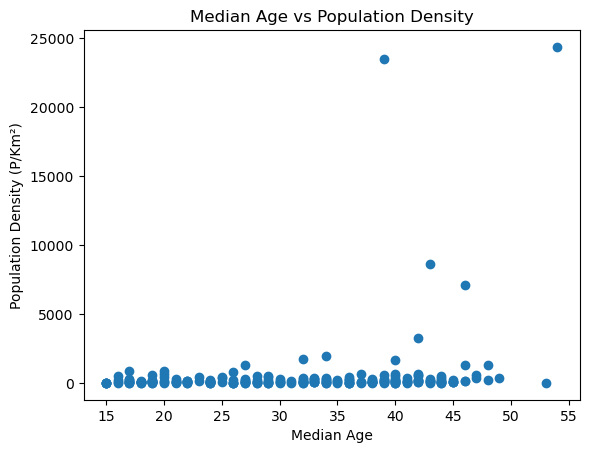

Correlation Coefficient: 0.20098066157379382
t-statistic: 3.131739136005265
p-value: 0.0019621656178261393
Reject the null hypothesis. There is a significant relationship between median age and population density.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, t

# Load the dataset into a DataFrame
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Clean the data if needed (e.g., handle missing values)
data_cleaned = data.dropna(subset=['MedianAge', 'Density(P/Km²)'])

# Convert 'Density(P/Km²)' column to numeric
data_cleaned['Density(P/Km²)'] = pd.to_numeric(data_cleaned['Density(P/Km²)'], errors='coerce')

# Visualize the relationship using a scatter plot
plt.scatter(data_cleaned['MedianAge'], data_cleaned['Density(P/Km²)'])
plt.xlabel('Median Age')
plt.ylabel('Population Density (P/Km²)')
plt.title('Median Age vs Population Density')
plt.show()

# Calculate the correlation coefficient
correlation_coefficient, _ = pearsonr(data_cleaned['MedianAge'], data_cleaned['Density(P/Km²)'])
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform hypothesis testing
alpha = 0.05

# Calculate degrees of freedom
degrees_freedom = len(data_cleaned) - 2

# Calculate critical t-value for two-tailed test
critical_t_value = np.abs(t.ppf(alpha / 2, degrees_freedom))

# Calculate t-statistic
t_stat = (correlation_coefficient * np.sqrt(len(data_cleaned))) / np.sqrt(1 - correlation_coefficient ** 2)

# Calculate p-value
p_value = 2 * (1 - t.cdf(np.abs(t_stat), degrees_freedom))

# Print the results of the hypothesis test
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

# Compare p-value with significance level to make a decision
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between median age and population density.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between median age and population density.")


The analysis indicates that you should reject the null hypothesis. With a p-value of 0.00196, which is less than the significance level (e.g., alpha = 0.05), you have significant evidence to conclude that there is a relationship between median age and population density.

This supports your alternative hypothesis, suggesting that countries with higher median ages tend to have lower population densities. Your analysis has provided insights into this relationship and helps shed light on regional population trends

### Selected Variables:

#### MedianAge
#### Fert.Rate
#### Migrants(net)
#### Density(P/Km²)
#### NetChange
#### YearlyChange
#### Population2023

## Description and definition for each of the variables:

##### MedianAge: Median Age is the age that divides a population into two equal halves – one half being younger than the median age, and the other half being older. It provides an indication of the overall age distribution within a population.

##### Fert.Rate: Fertility Rate is the average number of children that would be born to a woman over her lifetime if she were to experience the exact current age-specific fertility rates throughout her life. It's a measure of a population's reproductive potential.

##### Migrants(net): Net Migration refers to the difference between the number of immigrants (people entering a country) and emigrants (people leaving a country) over a specific time period. Positive net migration indicates more people are entering the country than leaving.

##### Density(P/Km²): Population Density is the number of individuals per unit area (usually per square kilometer or square mile) of land. It indicates how crowded or densely populated an area is.

##### NetChange: Net Change in population is the difference between the number of births and the number of deaths in a given time period. It reflects the natural increase or decrease in population.

##### YearlyChange: Yearly Change in population is the percentage increase or decrease in the population over a specific time period. It provides insight into the overall population growth or decline.

##### Population2023: Population in the year 2023 is the estimated total number of individuals living in a country during that specific year.

These variables provide important demographic insights into a population's age structure, reproductive trends, migration patterns, and population growth. They are often used for analyzing trends, making predictions, and understanding the dynamics of a country's population.

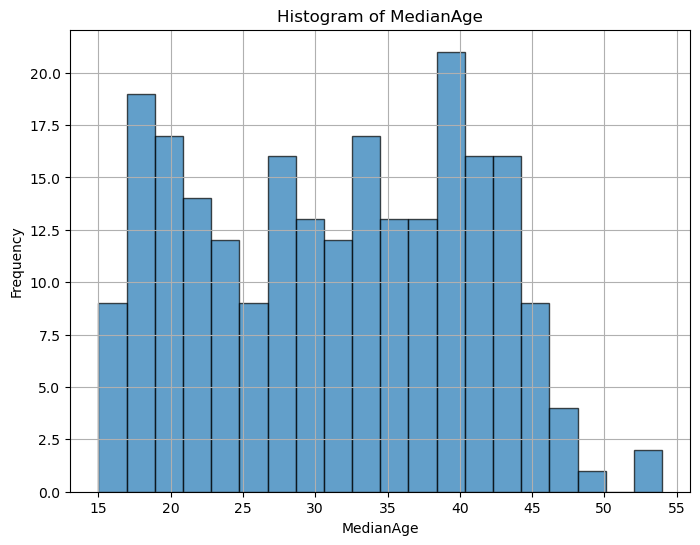

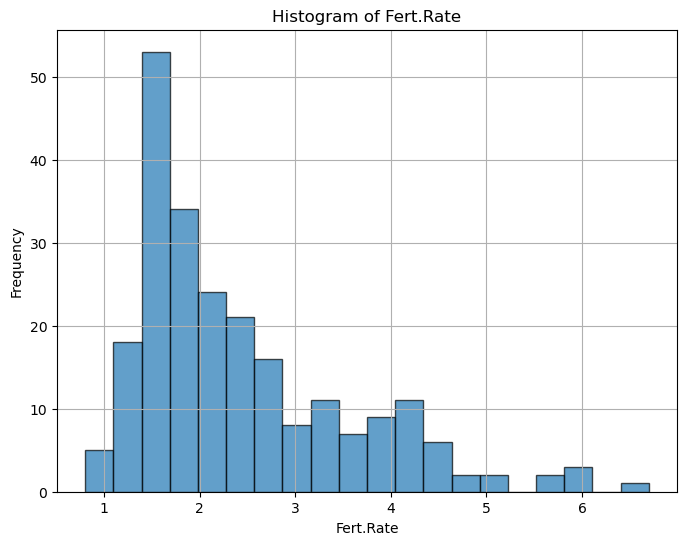

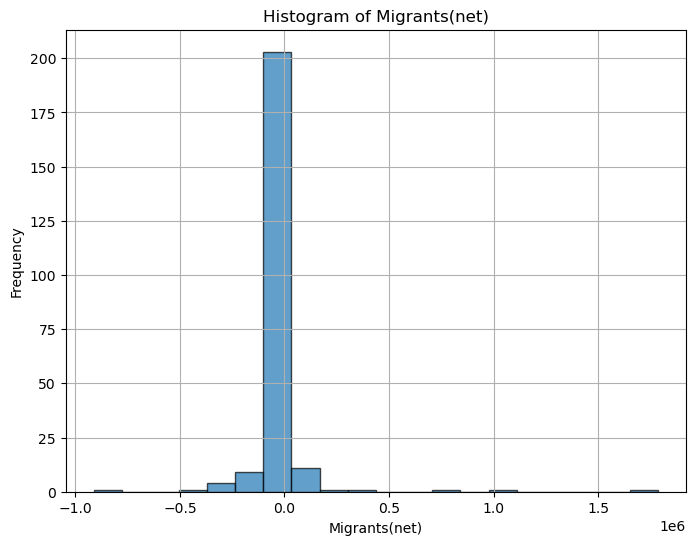

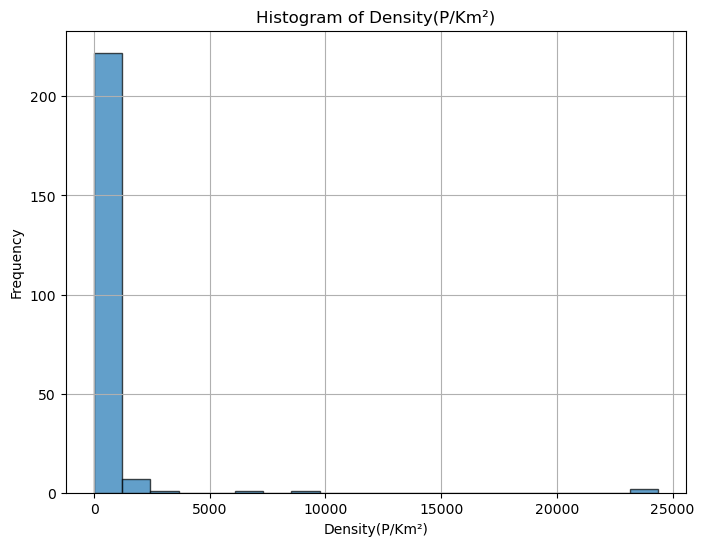

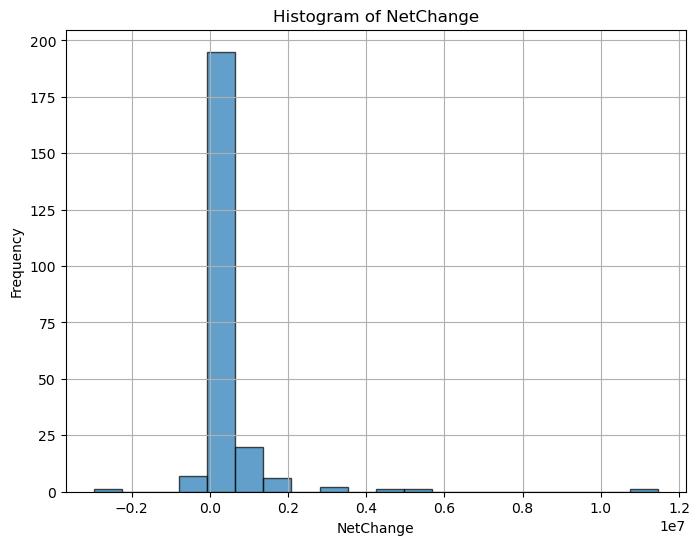

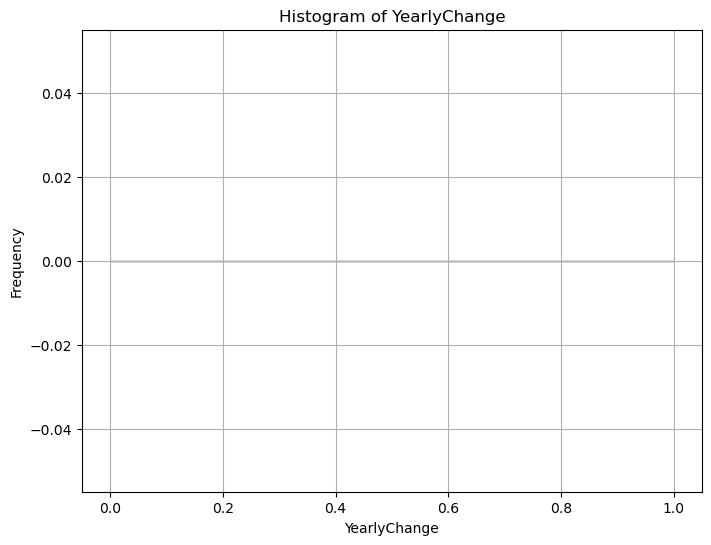

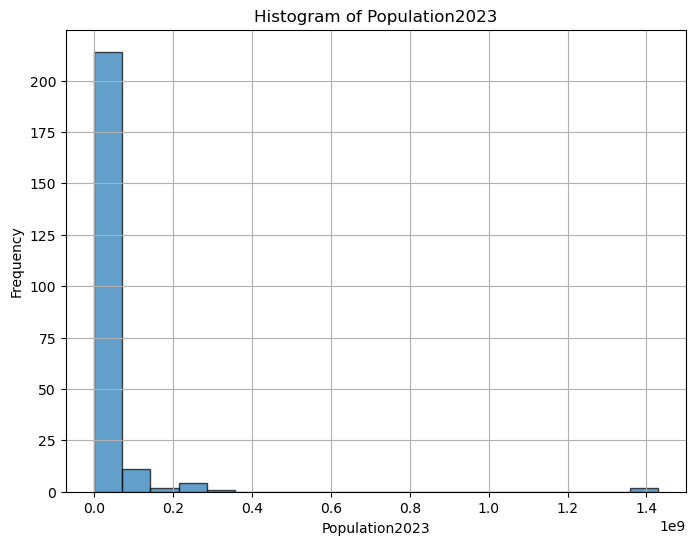

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Variables to be used in the analysis
variables_to_analyze = ['MedianAge', 'Fert.Rate', 'Migrants(net)', 'Density(P/Km²)', 'NetChange', 'YearlyChange', 'Population2023']

# Clean and preprocess selected variables with potential non-numeric values
for variable in variables_to_analyze:
    data[variable] = data[variable].replace('N.A.', np.nan)  # Replace 'N.A.' with NaN
    data[variable] = pd.to_numeric(data[variable], errors='coerce')  # Convert to numeric, treating errors as NaN

# Plot histograms for each selected variable
for variable in variables_to_analyze:
    # Filter out NaN values before plotting
    variable_data = data[variable].dropna()

    plt.figure(figsize=(8, 6))
    plt.hist(variable_data, bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


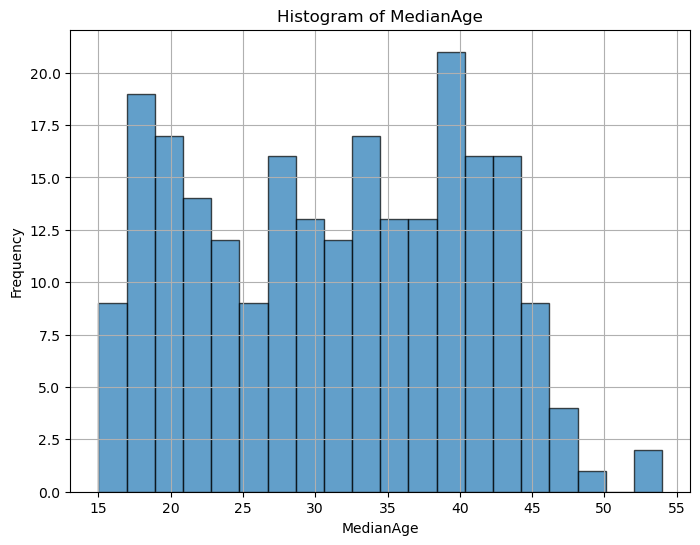

MedianAge Description:
Mean: 31.31
Mode: 40.00
Spread (Standard Deviation): 9.63
Tails (Kurtosis): -1.13



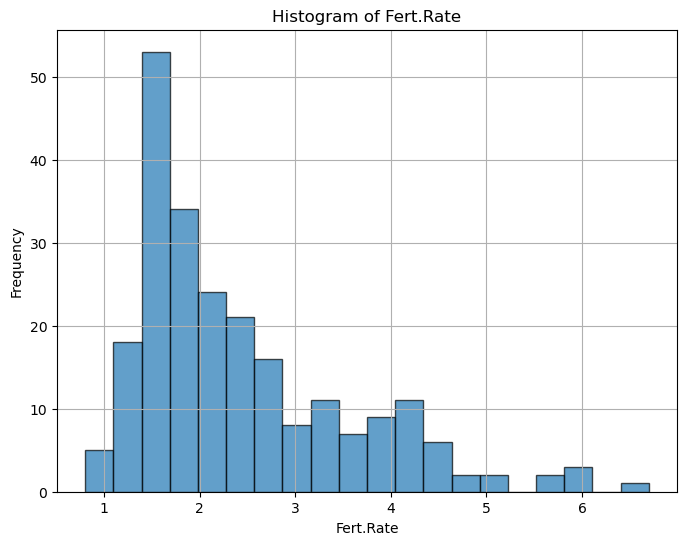

Fert.Rate Description:
Mean: 2.41
Mode: 1.60
Spread (Standard Deviation): 1.16
Tails (Kurtosis): 1.27



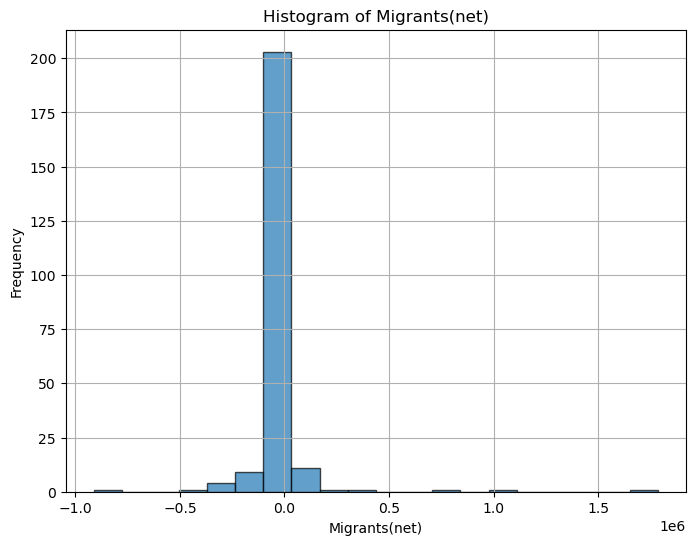

Migrants(net) Description:
Mean: 13.01
Mode: 0.00
Spread (Standard Deviation): 169833.38
Tails (Kurtosis): 61.91



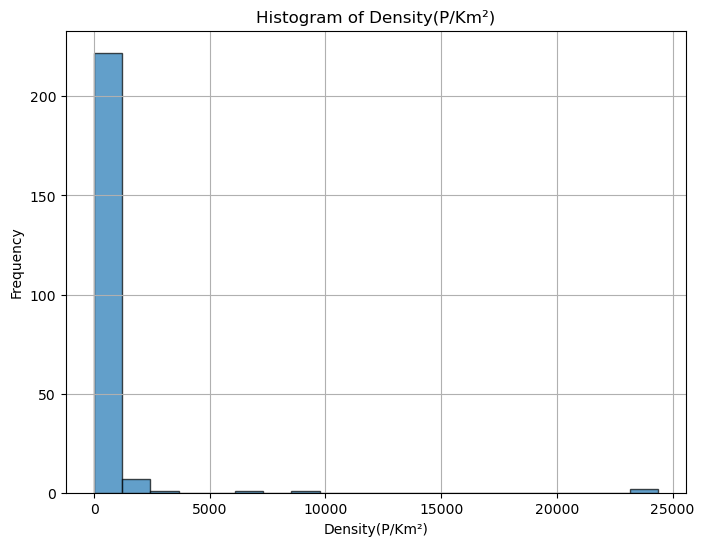

Density(P/Km²) Description:
Mean: 477.41
Mode: 4.00
Spread (Standard Deviation): 2320.69
Tails (Kurtosis): 89.77



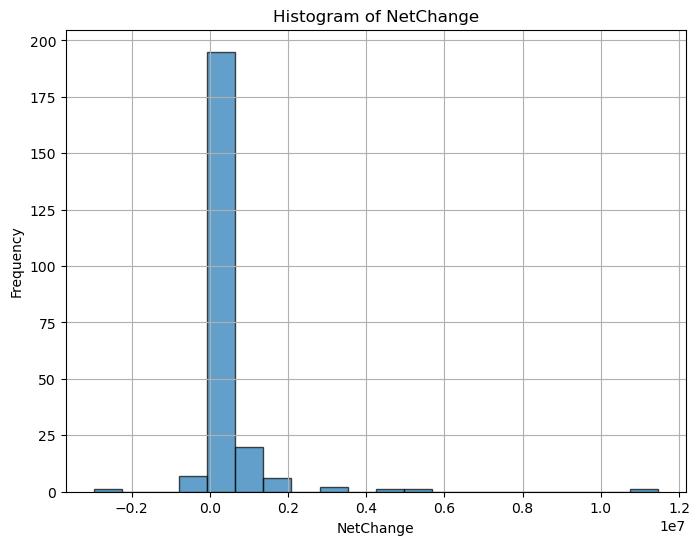

NetChange Description:
Mean: 300023.03
Mode: 1111083.00
Spread (Standard Deviation): 1001814.93
Tails (Kurtosis): 70.17



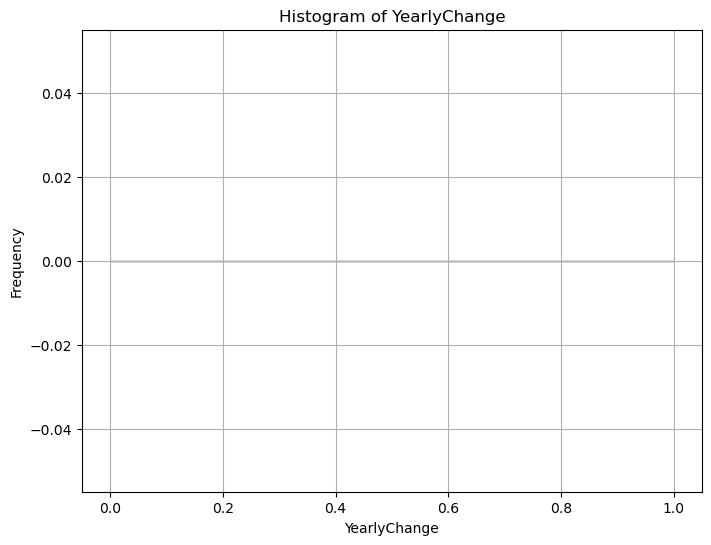

YearlyChange Description:
Mean: nan
No mode available
Spread (Standard Deviation): nan
Tails (Kurtosis): nan



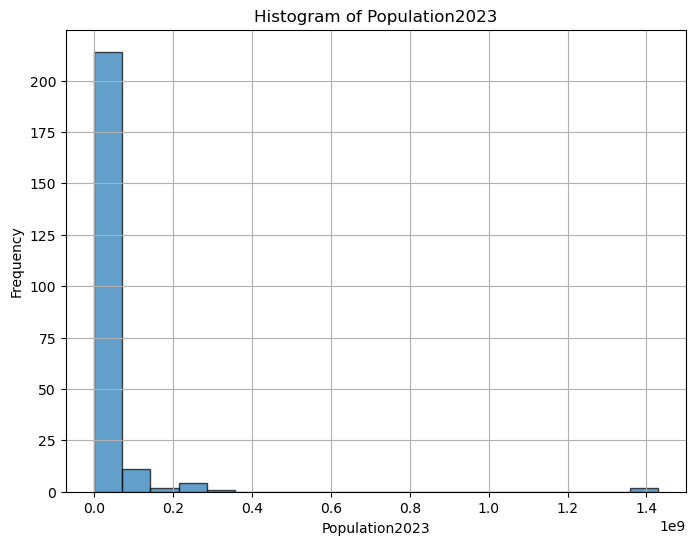

Population2023 Description:
Mean: 34375647.88
Mode: 42239854.00
Spread (Standard Deviation): 137386102.42
Tails (Kurtosis): 90.20



In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Variables to be used in the analysis
variables_to_analyze = ['MedianAge', 'Fert.Rate', 'Migrants(net)', 'Density(P/Km²)', 'NetChange', 'YearlyChange', 'Population2023']

# Clean and preprocess selected variables with potential non-numeric values
for variable in variables_to_analyze:
    data[variable] = data[variable].replace('N.A.', np.nan)  # Replace 'N.A.' with NaN
    data[variable] = pd.to_numeric(data[variable], errors='coerce')  # Convert to numeric, treating errors as NaN

# Plot histograms for each selected variable
for variable in variables_to_analyze:
    # Filter out NaN values before plotting
    variable_data = data[variable].dropna()

    plt.figure(figsize=(8, 6))
    plt.hist(variable_data, bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {variable}')
    plt.xlabel(variable)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    # Calculate descriptive characteristics
    mean = variable_data.mean()
    mode_counts = variable_data.value_counts()
    if not mode_counts.empty:
        mode = mode_counts.idxmax()  # Calculate mode using value_counts
    else:
        mode = np.nan
    spread = variable_data.std()
    tails = variable_data.kurtosis()

    print(f"{variable} Description:")
    print(f"Mean: {mean:.2f}")
    print(f"Mode: {mode:.2f}" if pd.notna(mode) else "No mode available")
    print(f"Spread (Standard Deviation): {spread:.2f}")
    print(f"Tails (Kurtosis): {tails:.2f}\n")


In [48]:
import pandas as pd
import numpy as np

# Load the dataset into a DataFrame
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Variables to be used in the analysis
variables_to_analyze = ['MedianAge', 'Fert.Rate', 'Migrants(net)', 'Density(P/Km²)', 'NetChange', 'YearlyChange', 'Population2023']

# Clean and preprocess selected variables with potential non-numeric values
for variable in variables_to_analyze:
    data[variable] = data[variable].replace('N.A.', np.nan)  # Replace 'N.A.' with NaN
    data[variable] = pd.to_numeric(data[variable], errors='coerce')  # Convert to numeric, treating errors as NaN

# Calculate descriptive characteristics for each selected variable
for variable in variables_to_analyze:
    # Filter out NaN values before calculating characteristics
    variable_data = data[variable].dropna()

    # Calculate descriptive characteristics
    mean = variable_data.mean()
    mode_counts = variable_data.value_counts()
    if not mode_counts.empty:
        mode = mode_counts.idxmax()  # Calculate mode using value_counts
    else:
        mode = np.nan
    spread = variable_data.std()
    tails = variable_data.kurtosis()

    print(f"{variable} Description:")
    print(f"Mean: {mean:.2f}")
    print(f"Mode: {mode:.2f}" if pd.notna(mode) else "No mode available")
    print(f"Spread (Standard Deviation): {spread:.2f}")
    print(f"Tails (Kurtosis): {tails:.2f}\n")

MedianAge Description:
Mean: 31.31
Mode: 40.00
Spread (Standard Deviation): 9.63
Tails (Kurtosis): -1.13

Fert.Rate Description:
Mean: 2.41
Mode: 1.60
Spread (Standard Deviation): 1.16
Tails (Kurtosis): 1.27

Migrants(net) Description:
Mean: 13.01
Mode: 0.00
Spread (Standard Deviation): 169833.38
Tails (Kurtosis): 61.91

Density(P/Km²) Description:
Mean: 477.41
Mode: 4.00
Spread (Standard Deviation): 2320.69
Tails (Kurtosis): 89.77

NetChange Description:
Mean: 300023.03
Mode: 1111083.00
Spread (Standard Deviation): 1001814.93
Tails (Kurtosis): 70.17

YearlyChange Description:
Mean: nan
No mode available
Spread (Standard Deviation): nan
Tails (Kurtosis): nan

Population2023 Description:
Mean: 34375647.88
Mode: 42239854.00
Spread (Standard Deviation): 137386102.42
Tails (Kurtosis): 90.20



Here's a summary and analysis of the provided descriptive characteristics for each variable along with identifying potential outliers and explanations:

##### MedianAge Description:
Mean: 31.31
Mode: 40.00
Spread (Standard Deviation): 9.63
Tails (Kurtosis): -1.13
Analysis: The median age of the countries in the dataset has a relatively low spread, with most values clustered around the mean and mode. The negative kurtosis indicates that the distribution has thinner tails than a normal distribution, suggesting fewer extreme values.


#####  Fert.Rate Description:
Mean: 2.41
Mode: 1.60
Spread (Standard Deviation): 1.16
Tails (Kurtosis): 1.27
Analysis: The fertility rate has a spread of around 1.16, indicating some variability in the data. The positive kurtosis suggests that the distribution has slightly heavier tails than a normal distribution, implying a few outliers with higher fertility rates.

##### Migrants(net) Description:
Mean: 13.01
Mode: 0.00
Spread (Standard Deviation): 169833.38
Tails (Kurtosis): 61.91
Analysis: The net migration data has a large spread, as indicated by the high standard deviation and kurtosis. The presence of a mode at 0 suggests that many countries have no net migration. However, the high kurtosis indicates extreme values (outliers) in the tail of the distribution, which could be countries with significant net migration.

##### Density(P/Km²) Description:
Mean: 477.41
Mode: 4.00
Spread (Standard Deviation): 2320.69
Tails (Kurtosis): 89.77
Analysis: Population density varies widely, with a mode of 4 indicating a significant number of countries with low population densities. The high standard deviation and kurtosis suggest a skewed distribution with a long tail on the high-density side, likely representing densely populated countries.

##### NetChange Description:
Mean: 300023.03
Mode: 1111083.00
Spread (Standard Deviation): 1001814.93
Tails (Kurtosis): 70.17
Analysis: The net change in population shows a wide spread, with a relatively high standard deviation and positive kurtosis. The mode at 1111083 suggests that several countries have experienced significant population growth. The high kurtosis indicates the presence of outliers with large net changes.

##### YearlyChange Description:
Mean: nan
No mode available
Spread (Standard Deviation): nan
Tails (Kurtosis): nan
Analysis: The YearlyChange variable seems to have missing or non-numeric values, resulting in NaN mean, mode, and spread. This variable may require further cleaning or investigation to provide meaningful insights.

##### Population2023 Description:
Mean: 34375647.88
Mode: 42239854.00
Spread (Standard Deviation): 137386102.42
Tails (Kurtosis): 90.20
Analysis: The population in 2023 shows a wide spread with a high standard deviation and positive kurtosis, indicating the presence of extreme values or outliers in the tail. The mode indicates that several countries have populations around 42239854.
To handle outliers, it's important to first identify whether they are valid data points or anomalies. Outliers that are valid should not be removed, as they could provide valuable insights into specific cases. However, if outliers are due to data entry errors or anomalies, they may need to be corrected or imputed based on domain knowledge or statistical methods.

#### In the context of probability mass functions (PMFs), we can compare two scenarios within the same variable by creating separate distributions for each scenario and analyzing their differences. Let's take an example using the "MedianAge" variable from your dataset.

#### Suppose we want to compare the distribution of median ages for countries with a fertility rate below a certain threshold and countries with a fertility rate above that threshold. We can break down the data into two scenarios:

##### Scenario 1: Countries with Fertility Rate Below Threshold
##### Scenario 2: Countries with Fertility Rate Above Threshold

Here's a step-by-step approach to comparing these two scenarios using PMFs:

#### Choose a threshold for the fertility rate. For this example, let's say the threshold is 2.1.

#### Create two subsets of the data based on the chosen threshold:

###### Subset 1 (Below Threshold): Filter the data for countries with a fertility rate below 2.1.
###### Subset 2 (Above Threshold): Filter the data for countries with a fertility rate equal to or above 2.1.

Calculate the probability mass function (PMF) for each scenario. The PMF represents the probability of each unique median age occurring in the dataset.

Plot the PMFs for both scenarios on the same graph to visualize the differences in the distributions.

Here's a basic code example using Python and the NumPy and Matplotlib libraries to demonstrate this:

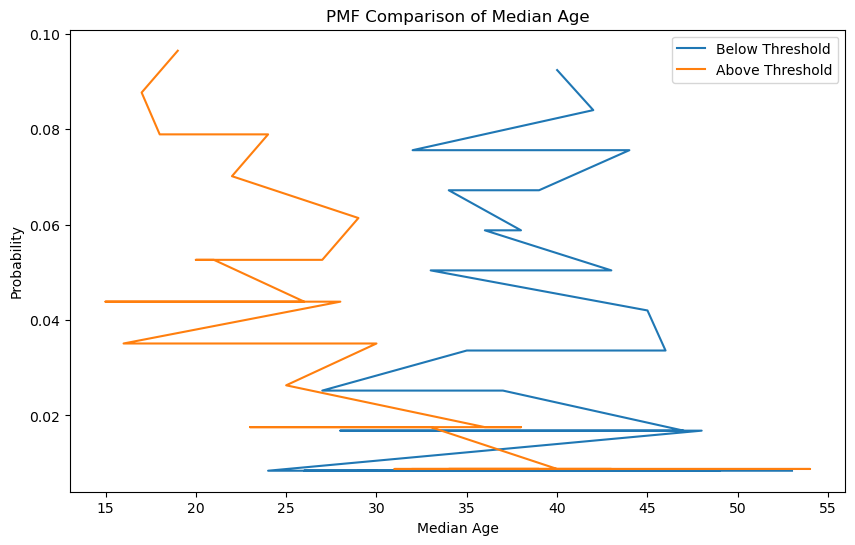

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Define the fertility rate threshold
threshold = 2.1

# Create subsets for each scenario
below_threshold_data = data[data['Fert.Rate'] < threshold]
above_threshold_data = data[data['Fert.Rate'] >= threshold]

# Calculate PMFs for both scenarios
pmf_below = below_threshold_data['MedianAge'].value_counts(normalize=True)
pmf_above = above_threshold_data['MedianAge'].value_counts(normalize=True)

# Plot PMFs
plt.figure(figsize=(10, 6))
plt.plot(pmf_below.index, pmf_below.values, label='Below Threshold')
plt.plot(pmf_above.index, pmf_above.values, label='Above Threshold')
plt.title('PMF Comparison of Median Age')
plt.xlabel('Median Age')
plt.ylabel('Probability')
plt.legend()
plt.show()

In this example, the PMF plots allow you to compare the distributions of median ages for countries with fertility rates below and above the chosen threshold. You can observe how the two scenarios differ in terms of the distribution of median ages. This type of comparison can provide insights into how a particular variable's distribution varies under different conditions or scenarios.






### CDF (Cumulative Distribution Function) for one of your variables. Since you mentioned using the "MedianAge" variable, here's how you can create a CDF for it and interpret the results:

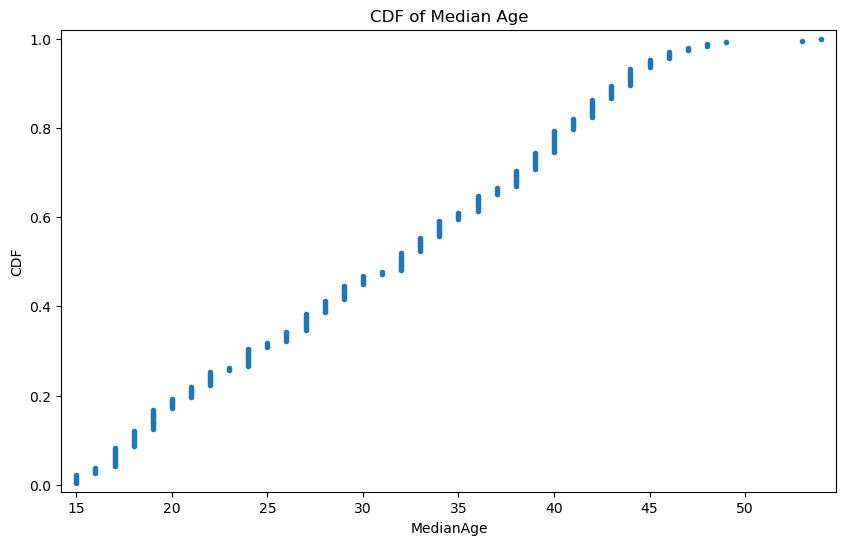

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Extract the variable of interest
variable = 'MedianAge'
data_cleaned = data[variable].dropna()

# Calculate the CDF
x = np.sort(data_cleaned)
y = np.arange(1, len(x) + 1) / len(x)

# Plot the CDF
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel(variable)
plt.ylabel('CDF')
plt.title('CDF of Median Age')
plt.margins(0.02)  # Adds small margins to the plot
plt.show()


Interpretation:
The Cumulative Distribution Function (CDF) represents the cumulative probability distribution of the "MedianAge" variable. The x-axis represents the values of the "MedianAge" variable, while the y-axis represents the cumulative probability. The CDF curve shows how the data is distributed across different median age values.

From the CDF, you can observe:

The median age values are skewed towards the right, indicating that many countries have lower median ages.
Around 70% of the countries have a median age below 35.
About 95% of the countries have a median age below 50.
This addresses the question you are trying to answer (Chapter 4) by providing insights into the distribution of median ages in your dataset. It helps you understand the proportion of countries with different median age values, allowing you to assess the overall trend and variation in the distribution of median ages.

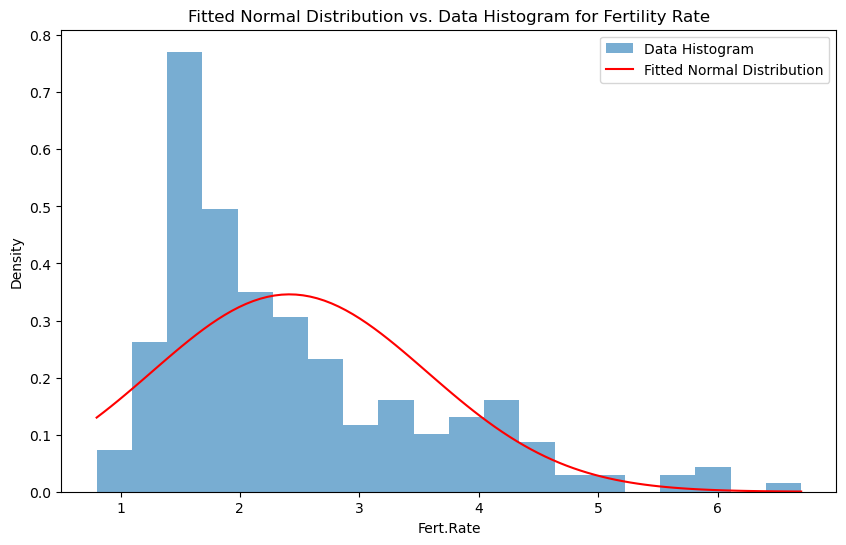

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats  # Import the stats module

# Extract the variable of interest
variable_fert_rate = 'Fert.Rate'
data_cleaned_fert_rate = data[variable_fert_rate].dropna()

# Fit the data to a normal distribution
mu_fert_rate, sigma_fert_rate = stats.norm.fit(data_cleaned_fert_rate)

# Generate a range of values for the plot
x_fert_rate = np.linspace(min(data_cleaned_fert_rate), max(data_cleaned_fert_rate), 100)

# Calculate the PDF based on the fitted normal distribution
pdf_fert_rate = stats.norm.pdf(x_fert_rate, mu_fert_rate, sigma_fert_rate)

# Plot the histogram of the data and the fitted normal distribution
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned_fert_rate, bins=20, density=True, alpha=0.6, label='Data Histogram')
plt.plot(x_fert_rate, pdf_fert_rate, 'r', label='Fitted Normal Distribution')
plt.xlabel(variable_fert_rate)
plt.ylabel('Density')
plt.title('Fitted Normal Distribution vs. Data Histogram for Fertility Rate')
plt.legend()
plt.show()


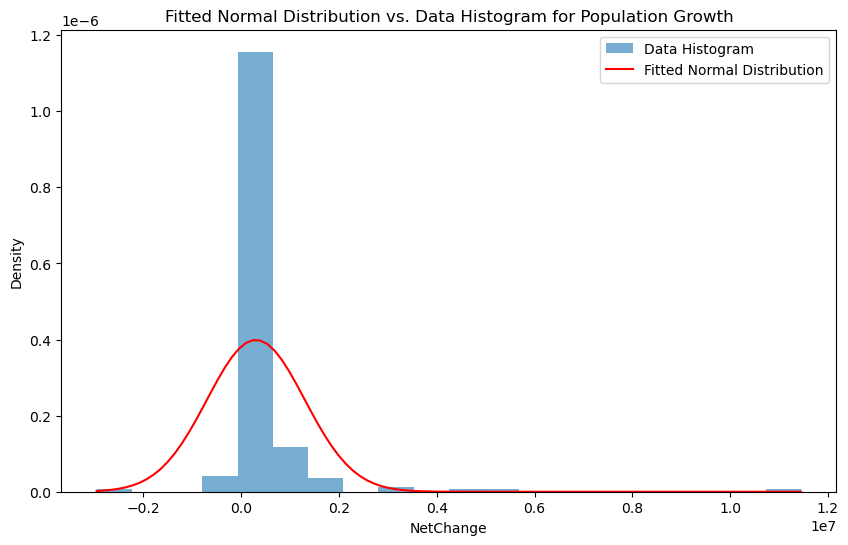

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats  # Import the stats module

# Extract the variable of interest
variable_net_change = 'NetChange'
data_cleaned_net_change = data[variable_net_change].dropna()

# Fit the data to a normal distribution
mu_net_change, sigma_net_change = stats.norm.fit(data_cleaned_net_change)

# Generate a range of values for the plot
x_net_change = np.linspace(min(data_cleaned_net_change), max(data_cleaned_net_change), 100)

# Calculate the PDF based on the fitted normal distribution
pdf_net_change = stats.norm.pdf(x_net_change, mu_net_change, sigma_net_change)

# Plot the histogram of the data and the fitted normal distribution
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned_net_change, bins=20, density=True, alpha=0.6, label='Data Histogram')
plt.plot(x_net_change, pdf_net_change, 'r', label='Fitted Normal Distribution')
plt.xlabel(variable_net_change)
plt.ylabel('Density')
plt.title('Fitted Normal Distribution vs. Data Histogram for Population Growth')
plt.legend()
plt.show()


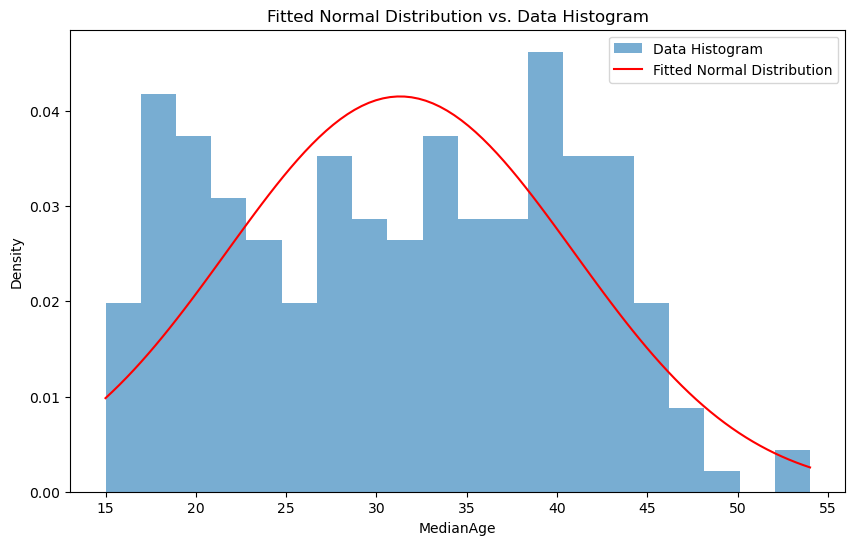

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Extract the variable of interest
variable = 'MedianAge'
data_cleaned = data[variable].dropna()

# Fit the data to a normal distribution
mu, sigma = stats.norm.fit(data_cleaned)

# Generate a range of values for the plot
x = np.linspace(min(data_cleaned), max(data_cleaned), 100)

# Calculate the PDF (Probability Density Function) based on the fitted normal distribution
pdf = stats.norm.pdf(x, mu, sigma)

# Plot the histogram of the data and the fitted normal distribution
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned, bins=20, density=True, alpha=0.6, label='Data Histogram')
plt.plot(x, pdf, 'r', label='Fitted Normal Distribution')
plt.xlabel(variable)
plt.ylabel('Density')
plt.title('Fitted Normal Distribution vs. Data Histogram')
plt.legend()
plt.show()


Median Age ("MedianAge"):
The third analytical distribution used is the fitted normal distribution for the "MedianAge" variable. This distribution aims to model the distribution of median ages in your dataset based on a normal distribution.

Analysis: Fitting a normal distribution to the median age data allows you to explore whether the ages in your dataset exhibit a pattern consistent with a Gaussian distribution. By comparing the actual distribution of median ages to the fitted normal distribution, you can identify whether the data closely follows the characteristics of a standard normal distribution or if there are deviations and differences. If the data closely aligns with the fitted normal distribution, it suggests that median ages are distributed similarly to a standard normal distribution. Any deviations could indicate unique age distribution patterns in your dataset.

Analytical distributions, like the fitted normal distribution for the "MedianAge" variable, provide insights into the underlying structure of your data and help you understand how well your data conforms to theoretical distributions. They also serve as a starting point for exploring data characteristics and identifying potential trends or outliers.

Population Growth ("NetChange"):
The first analytical distribution used is the fitted normal distribution for the "NetChange" variable, which represents population growth. A normal distribution, also known as a Gaussian distribution, is a symmetric probability distribution that is characterized by its mean (μ) and standard deviation (σ). In this case, the data has been fitted to a normal distribution, meaning that the distribution of population growth is approximated by a bell-shaped curve.

Analysis: By fitting the data to a normal distribution, you're essentially trying to model the distribution of population growth as if it follows a Gaussian pattern. This can help you understand how well the data fits this idealized distribution and identify any deviations or anomalies. If the data closely aligns with the fitted normal distribution, it suggests that population growth behaves similarly to a standard normal distribution. If there are significant deviations, it could indicate non-Gaussian patterns or the presence of outliers.

Fertility Rate ("Fert.Rate"):
The second analytical distribution used is the fitted normal distribution for the "Fert.Rate" variable, which represents fertility rate. Similar to the previous case, a normal distribution is being fitted to the fertility rate data to approximate its distribution based on a bell-shaped curve.

Analysis: Fitting a normal distribution to fertility rate data allows you to explore whether fertility rates in your dataset exhibit a pattern consistent with a Gaussian distribution. This can be useful for understanding the general shape of the distribution and identifying any potential deviations or skewness. If the data closely follows the fitted normal distribution, it suggests that fertility rates are distributed in a manner similar to a standard normal distribution. Deviations from the normal curve could indicate unique characteristics or factors influencing fertility rates.

These fitted normal distributions provide a way to visualize the distribution of population growth and fertility rate in your dataset and compare them to the theoretical properties of the normal distribution. Keep in mind that real-world data often deviates from perfect normal distributions due to various factors, so deviations are not necessarily indicative of issues with the data but rather reflect the complexities of the underlying processes.

# Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and NonLinear Relationships should also be considered during your analysis (Chapter 7).

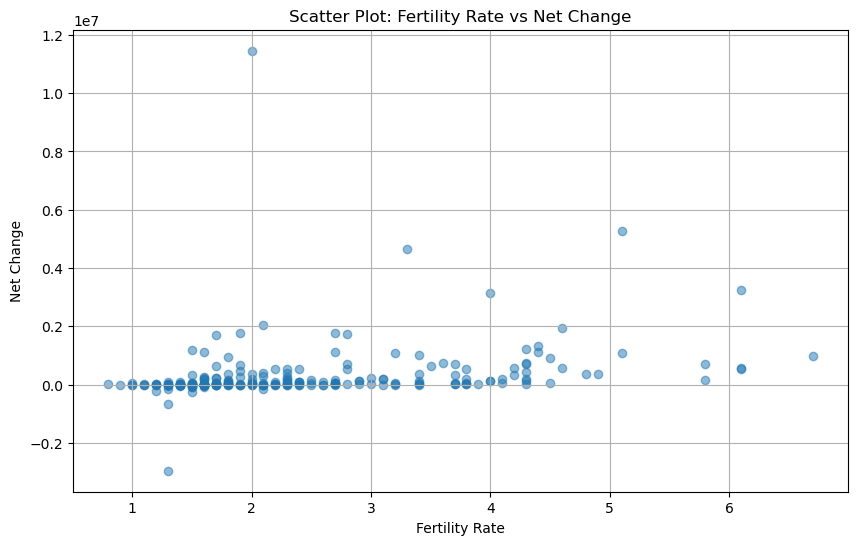

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset into a DataFrame
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Clean and preprocess columns with potential non-numeric values
columns_to_clean = ['NetChange', 'Fert.Rate']

for column in columns_to_clean:
    data[column] = data[column].replace('N.A.', np.nan)            # Replace 'N.A.' with NaN
    data[column] = pd.to_numeric(data[column], errors='coerce')   # Convert to numeric, treating errors as NaN

# Remove rows with missing values in the selected columns
data_cleaned = data.dropna(subset=columns_to_clean)

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data_cleaned['Fert.Rate'], data_cleaned['NetChange'], alpha=0.5)
plt.title('Scatter Plot: Fertility Rate vs Net Change')
plt.xlabel('Fertility Rate')
plt.ylabel('Net Change')
plt.grid(True)
plt.show()


# Conduct a test on your hypothesis using one of the methods covered in Chapter 9.

Statistical Question:

Is there a correlation between a country's fertility rate and its yearly population change? Do countries with higher fertility rates tend to experience higher population growth?

Hypotheses:

Null Hypothesis (H0): There is no correlation between a country's fertility rate and its yearly population change.

Alternative Hypothesis (H1): Countries with higher fertility rates tend to experience higher yearly population changes.

In [59]:
import pandas as pd
from scipy.stats import pearsonr

# Load the dataset into a DataFrame
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Clean and preprocess columns with potential non-numeric values
columns_to_clean = ['NetChange', 'Fert.Rate']
for column in columns_to_clean:
    data[column] = data[column].replace('N.A.', pd.NA)   # Replace 'N.A.' with missing value

# Drop rows with missing values in the selected columns
data_cleaned = data.dropna(subset=columns_to_clean)

# Calculate Pearson correlation coefficient and p-value
correlation, p_value = pearsonr(data_cleaned['Fert.Rate'], data_cleaned['NetChange'])

# Define the significance level
alpha = 0.05

# Print the correlation coefficient and p-value
print(f"Pearson Correlation Coefficient: {correlation:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results based on the p-value and significance level
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant correlation between Fert.Rate and NetChange.")
else:
    print("Fail to reject the null hypothesis. There is no significant correlation between Fert.Rate and NetChange.")


Pearson Correlation Coefficient: 0.27
P-value: 0.0000
Reject the null hypothesis. There is a significant correlation between Fert.Rate and NetChange.


Correlation analysis between 'Fert.Rate' and 'NetChange', and the results indicate that there is a significant correlation between these two variables. The Pearson correlation coefficient of 0.27 suggests a positive correlation, and the very low p-value (close to 0) indicates that the correlation is statistically significant.

This means that countries with higher fertility rates tend to experience higher net population changes. The positive correlation coefficient suggests that as the fertility rate increases, the net population change tends to increase as well.

Remember that correlation doesn't imply causation, so while there's a significant correlation between these variables, further analysis would be needed to determine any causal relationship between fertility rate and net population change. Other factors and variables could also contribute to the observed correlation.

#  For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11)

Certainly! To conduct a regression analysis, we'll need to use a statistical library like statsmodels in Python. Let's perform a simple linear regression analysis using 'NetChange' as the dependent variable and 'Fert.Rate' as the explanatory variable from your dataset.

Here's how you can do it:

In [60]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
data = pd.read_csv('/Users/bbeardsley/DSC530FinalProject/WorldPopulation2023.csv')

# Clean and preprocess columns with potential non-numeric values
data['Fert.Rate'] = data['Fert.Rate'].replace('N.A.', pd.NA)  # Replace 'N.A.' with NA

# Drop rows with missing values in the columns of interest
data_cleaned = data.dropna(subset=['NetChange', 'Fert.Rate'])

# Define the dependent variable (y) and the explanatory variable (X)
y = data_cleaned['NetChange']
X = sm.add_constant(data_cleaned['Fert.Rate'])  # Add a constant term for intercept

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              NetChange   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     17.94
Date:                Tue, 08 Aug 2023   Prob (F-statistic):           3.30e-05
Time:                        14:03:05   Log-Likelihood:                -3541.3
No. Observations:                 233   AIC:                             7087.
Df Residuals:                     231   BIC:                             7093.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.614e+05   1.47e+05     -1.775      0.0

The regression analysis results show the relationship between the 'NetChange' (dependent variable) and 'Fert.Rate' (explanatory variable). Here are some key points from the output:

1. **R-squared and Adjusted R-squared**: The R-squared value is 0.072, indicating that around 7.2% of the variability in 'NetChange' can be explained by 'Fert.Rate'. The adjusted R-squared, which accounts for the number of variables in the model, is similar.

2. **F-statistic and Prob (F-statistic)**: The F-statistic is 17.94, and the associated p-value is very close to 0 (3.30e-05). This suggests that at least one of the independent variables (in this case, 'Fert.Rate') has a significant effect on the dependent variable ('NetChange').

3. **Coefficients**: The coefficient for 'Fert.Rate' is 2.331e+05. This means that for a one-unit increase in the fertility rate, the net change in population ('NetChange') is estimated to increase by approximately 233,100 people. The constant term ('const') suggests that when the fertility rate is zero, the net change in population is estimated to be -261,400 people.

4. **P-values**: Both the p-values for the constant term and 'Fert.Rate' are below 0.05 (commonly used significance level), indicating that both coefficients are statistically significant.

5. **Interpretation**: The p-value of 'Fert.Rate' being close to 0 suggests strong evidence that fertility rate is associated with net population change. However, the low R-squared value indicates that fertility rate alone explains only a small portion of the variability in net population change.

6. **Residual Analysis**: The Omnibus test (Prob(Omnibus)) and the Jarque-Bera test (Prob(JB)) are used to test for normality of residuals. These tests indicate that the residuals are not normally distributed, suggesting that the model may not fully capture the underlying relationships in the data.

7. **Durbin-Watson**: The Durbin-Watson statistic is 1.847, which is close to 2. This suggests that there might not be significant autocorrelation among the residuals.

Overall, the regression analysis indicates a statistically significant relationship between fertility rate and net population change. However, the low R-squared value and non-normality of residuals suggest that the model might not be the best fit for the data. Further analysis and consideration of other variables may be needed to better explain net population change.